**Clique** - is a set of vertices in a graph where every pair of vertices is connected by an edge, representing mutual relationship.

/var/folders/78/lstcwc951zs14wpz1_zzh_cc0000gn/T/ipykernel_76768/3198999626.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


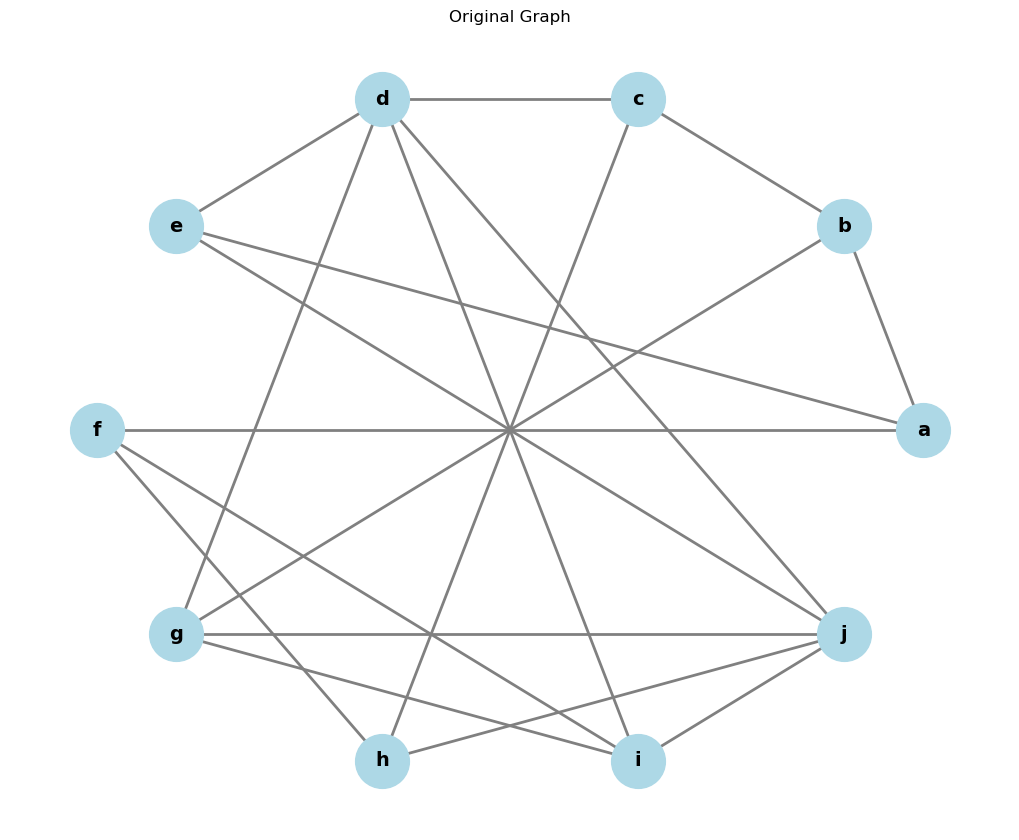

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([('a', 'b'), ('b', 'c'), ('c', 'd'), ('d', 'e'), ('e', 'a'),
                  ('f', 'a'), ('g', 'b'), ('h', 'c'), ('i', 'd'), ('j', 'e'), 
                  ('f', 'h'), ('h', 'j'), ('j', 'g'), ('g', 'i'), ('i', 'f'),
                  ('j', 'i'), ('j', 'd'), ('d', 'g')])

# Visualize the original graph
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 8))

nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, font_size=14, font_weight='bold',
        edge_color='gray', width=2)

plt.title("Original Graph")
plt.axis('off')
plt.tight_layout()
plt.show()

All cliques in the graph:
  Clique 1: ['b', 'g']
  Clique 2: ['a', 'b']
  Clique 3: ['b', 'c']
  Clique 4: ['d', 'g', 'i', 'j']
  Clique 5: ['d', 'e', 'j']
  Clique 6: ['c', 'd']
  Clique 7: ['f', 'i']
  Clique 8: ['a', 'f']
  Clique 9: ['f', 'h']
  Clique 10: ['h', 'j']
  Clique 11: ['c', 'h']
  Clique 12: ['a', 'e']

Maximum clique: ['d', 'g', 'i', 'j']
Clique size: 4


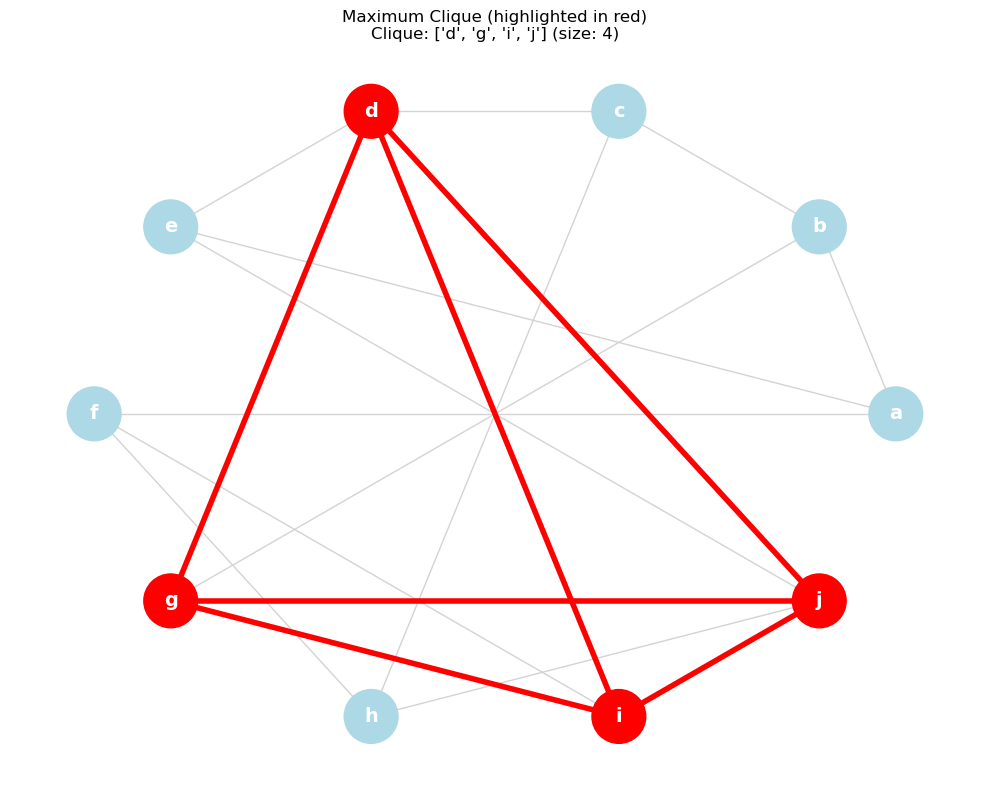

In [2]:
# Find all cliques
cliques = list(nx.find_cliques(G))
print(f"All cliques in the graph:")
for i, clique in enumerate(cliques, 1):
    print(f"  Clique {i}: {sorted(clique)}")

# Find the maximum clique
max_clique = max(cliques, key=len)
print(f"\nMaximum clique: {sorted(max_clique)}")
print(f"Clique size: {len(max_clique)}")

# Visualize the graph with maximum clique highlighted
plt.figure(figsize=(10, 8))

# Assign colors: red for max clique nodes, lightblue for others
node_colors = ['red' if node in max_clique else 'lightblue' for node in G.nodes()]

# Draw all edges in gray first
nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=1)

# Highlight edges within the maximum clique
clique_edges = [(u, v) for u in max_clique for v in max_clique if u < v and G.has_edge(u, v)]
nx.draw_networkx_edges(G, pos, edgelist=clique_edges, edge_color='red', width=4)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold', font_color='white')

plt.title(f"Maximum Clique (highlighted in red)\nClique: {sorted(max_clique)} (size: {len(max_clique)})")
plt.axis('off')
plt.tight_layout()
plt.show()